In [200]:
%matplotlib inline

#----- Libraries Section -----

#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

#Other Libraries
from sklearn import metrics
from itertools import cycle,islice
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import kneighbors_graph
import time
import warnings


In [112]:
#----- Data Section -----

dataset = pd.read_csv(r"C:\Users\Edwin U Kannanaikkal\Downloads\tripadvisor_review.csv")
df = pd.DataFrame(dataset)
df_refined = df.drop("User ID",axis=1)
X = df_refined.values

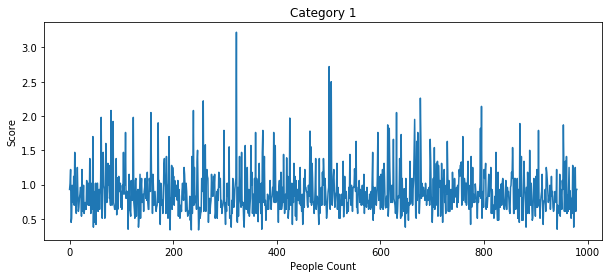

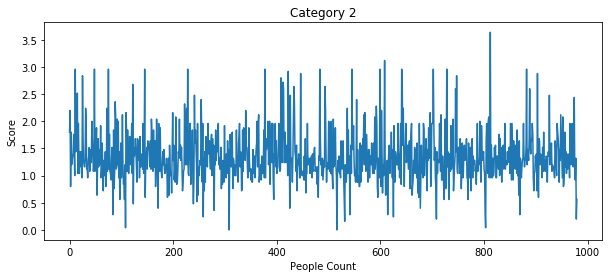

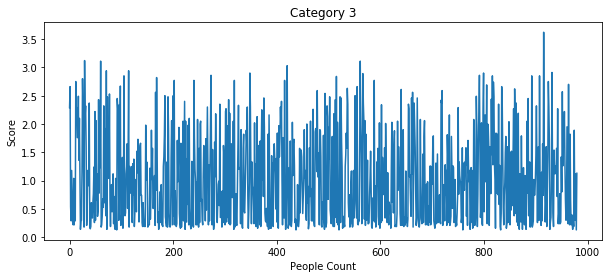

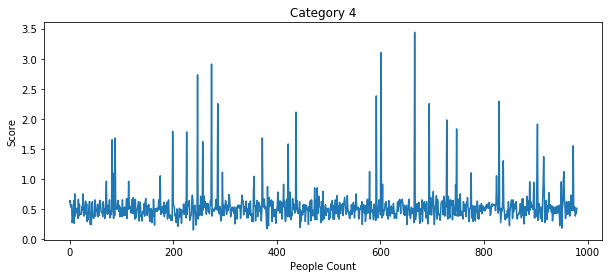

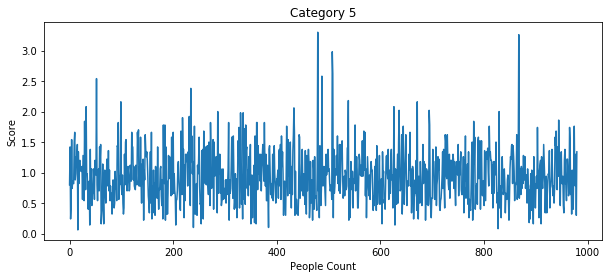

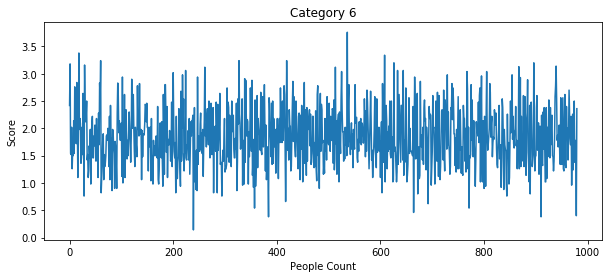

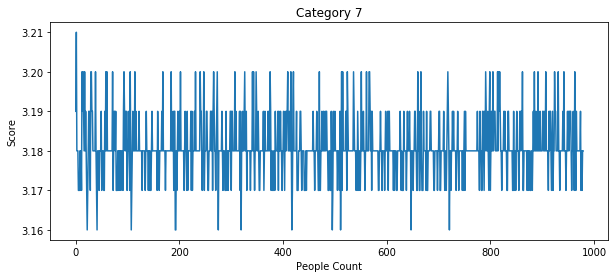

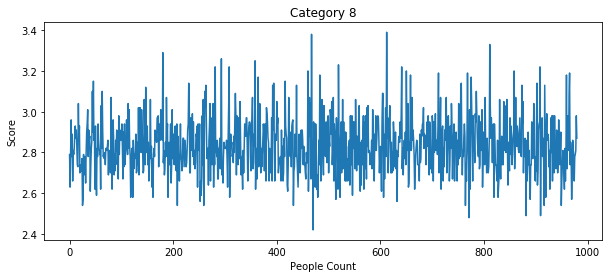

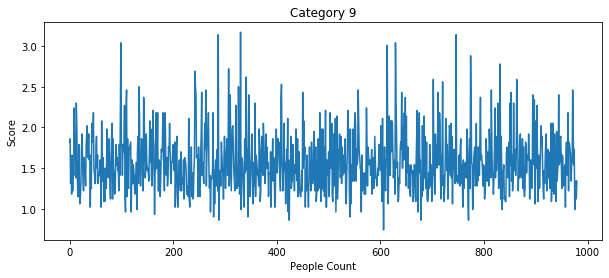

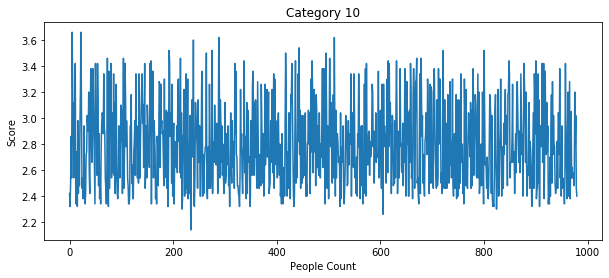

In [104]:
#----- Basic Data Analysis -----

list1 = df[0:1]
columns = list1.drop('User ID',axis=1)

for i in columns:
    plt.figure(figsize=(10,4))
    plt.plot(df[i])
    plt.title(i)
    plt.xlabel("People Count")
    plt.ylabel("Score")
    plt.show()

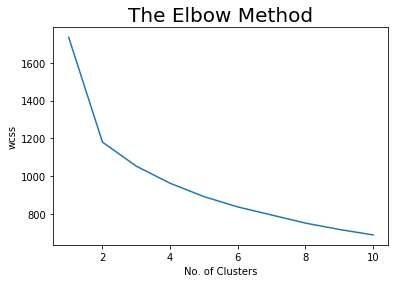

Average Silhouette Method

For no of clusters = 2  The average silhouette_score is : 0.3008527930106379
For no of clusters = 3  The average silhouette_score is : 0.20414720102592063
For no of clusters = 4  The average silhouette_score is : 0.16138635229434
For no of clusters = 5  The average silhouette_score is : 0.16323869378429645
For no of clusters = 6  The average silhouette_score is : 0.1657262770677326


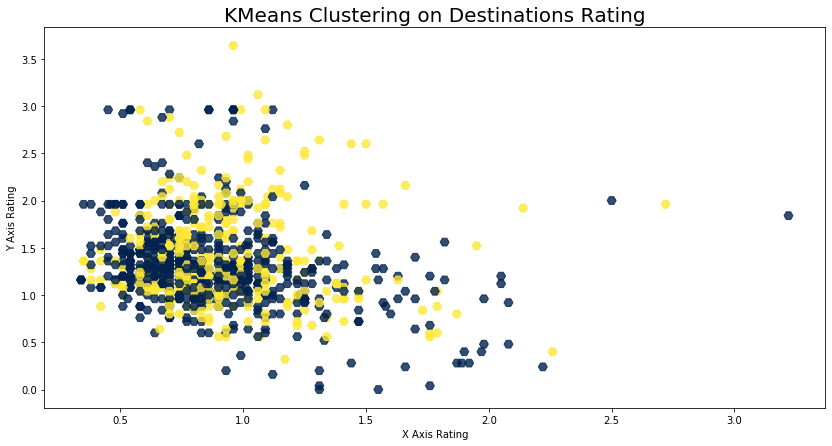

In [210]:
#----- Clusterings -----

#Elbow Method

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#Silhouette Method

no_of_clusters = [2, 3, 4, 5, 6] 
print("Average Silhouette Method\n")
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters," The average silhouette_score is :", silhouette_avg) 

#KMeans Clustering

kmean = KMeans(n_clusters=2, random_state=0).fit(X)
y_kmeans = kmean.predict(X)
lab = kmean.labels_
#for i in range(1,10):
plt.figure(figsize=(14,7))
plt.title("KMeans Clustering on Destinations Rating",fontsize=20)
plt.scatter(X[:,0], X[:,1],c = y_kmeans, s=80, cmap='cividis',alpha=0.8,marker='H')
plt.xlabel("X Axis Rating")
plt.ylabel("Y Axis Rating")
plt.show()


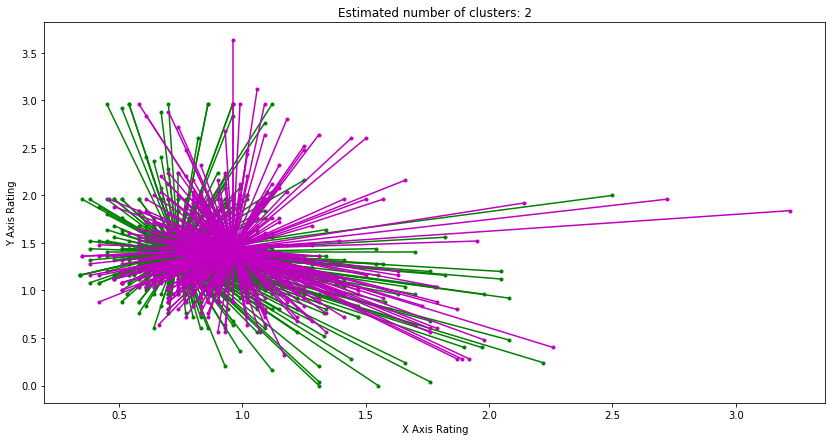

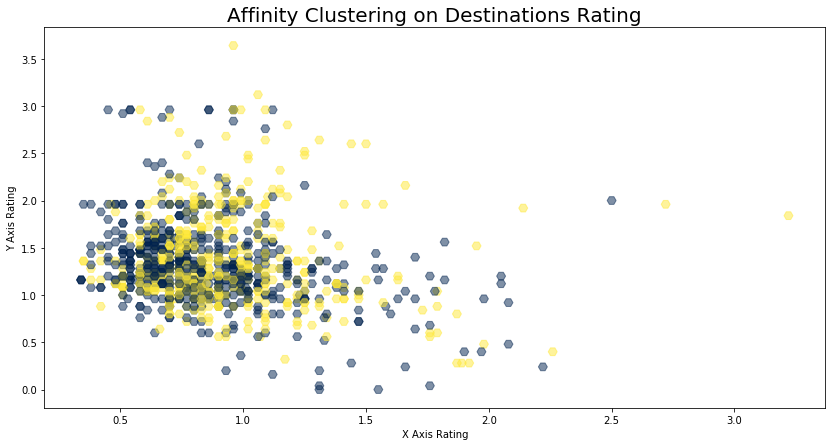

In [189]:
#Affinity Propogation Clustering

af = AffinityPropagation(preference=-500).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
plt.figure(figsize=(14,7))

colors = cycle('gmrcbykgmrcbykgmrcbykgmrcbyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.xlabel("X Axis Rating")
plt.ylabel("Y Axis Rating")
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

y_ac = af.predict(X)
plt.figure(figsize=(14,7))
plt.title("Affinity Clustering on Destinations Rating",fontsize=20)
plt.scatter(X[:,0], X[:,1],c = y_ac, s=80, cmap='cividis',alpha=0.5,marker='H')
plt.xlabel("X Axis Rating")
plt.ylabel("Y Axis Rating")
plt.show()

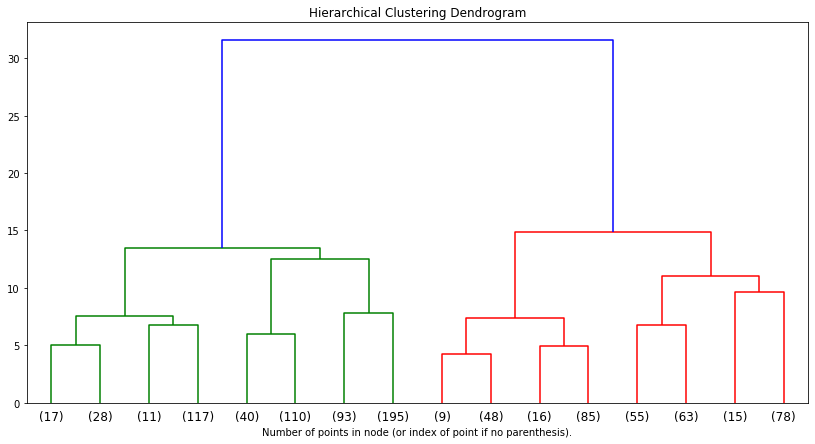

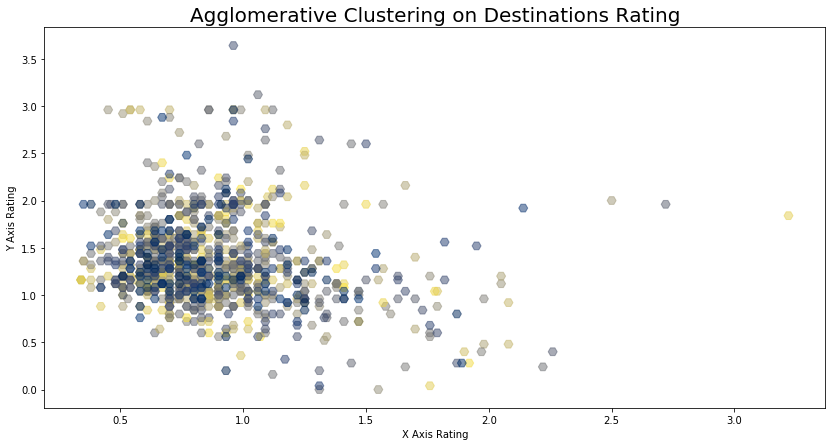

In [191]:
#Agglomerative Clustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(14,7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

y_agg = model.fit_predict(X)

plt.figure(figsize=(14,7))
plt.title("Agglomerative Clustering on Destinations Rating",fontsize=20)
plt.scatter(X[:,0], X[:,1],c = y_agg, s=80, cmap='cividis',alpha=0.5,marker='H')
plt.xlabel("X Axis Rating")
plt.ylabel("Y Axis Rating")
plt.show()

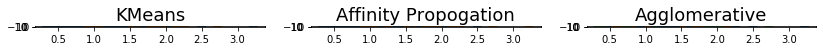

In [208]:
#----- Comparison between clustering algorithms -----

clustering_algorithms = (('KMeans',kmean),('Affinity Propogation',af),('Agglomerative',model))
plot_num=1
plt.figure(figsize=(14,7))
for name, algorithm in clustering_algorithms:
    t0 = time.time()
    algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(980, len(clustering_algorithms), plot_num)
    #if i_dataset == 0:
    plt.title(name, size=18)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a']),
                                      int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=60, color=colors[y_pred])

    #plt.xlim(-2.5, 2.5)
    #plt.ylim(-2.5, 2.5)
    #plt.xticks(())
    #plt.yticks(())
    #plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),transform=plt.gca().transAxes, size=15,horizontalalignment='right')
    plot_num += 1

plt.show()

In [196]:
len(df)

980